In [1]:
# import sys
# IN_COLAB = 'google.colab' in sys.modules

# if IN_COLAB:
#     !pip install deriva
#     !pip install bdbag
#     !pip install --upgrade --force pydantic
#     !pip install git+https://github.com/informatics-isi-edu/deriva-ml git+https://github.com/informatics-isi-edu/eye-ai-ml

In [2]:
repo_dir = "Repos"   # Set this to be where your github repos are located.
%load_ext autoreload
%autoreload 2

# Update the load path so python can find modules for the model
import sys
from pathlib import Path
sys.path.insert(0, str(Path.home() / repo_dir / "eye-ai-ml"))

In [3]:
# Prerequisites

import json
import os
from eye_ai.eye_ai import EyeAI
import pandas as pd
from pathlib import Path, PurePath
import logging
# import torch

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', force=True)

In [4]:

from deriva.core.utils.globus_auth_utils import GlobusNativeLogin
catalog_id = "eye-ai" #@param
host = 'www.eye-ai.org'


gnl = GlobusNativeLogin(host=host)
if gnl.is_logged_in([host]):
    print("You are already logged in.")
else:
    gnl.login([host], no_local_server=True, no_browser=True, refresh_tokens=True, update_bdbag_keychain=True)
    print("Login Successful")

2024-07-01 13:52:30,826 - INFO - Creating client of type <class 'globus_sdk.services.auth.client.native_client.NativeAppAuthClient'> for service "auth"
2024-07-01 13:52:30,827 - INFO - Finished initializing AuthLoginClient. client_id='8ef15ba9-2b4a-469c-a163-7fd910c9d111', type(authorizer)=<class 'globus_sdk.authorizers.base.NullAuthorizer'>


You are already logged in.


In [5]:
# Variables to configure the rest of the notebook.

cache_dir = '/data'        # Directory in which to cache materialized BDBags for datasets
working_dir = '/data'    # Directory in which to place output files for later upload.

configuration_rid = "2-C988" #"2-C8ZG" # rid
# Change the confi_file with bag_url=["minid: train", "minid: Valid", "minid: test"]



In [6]:
EA = EyeAI(hostname = host, catalog_id = catalog_id, cache_dir= cache_dir, working_dir=working_dir)

2024-07-01 13:52:30,867 - INFO - Creating client of type <class 'globus_sdk.services.auth.client.native_client.NativeAppAuthClient'> for service "auth"
2024-07-01 13:52:30,868 - INFO - Finished initializing AuthLoginClient. client_id='8ef15ba9-2b4a-469c-a163-7fd910c9d111', type(authorizer)=<class 'globus_sdk.authorizers.base.NullAuthorizer'>


In [7]:
# @title Initiate an Execution
configuration_records = EA.execution_init(configuration_rid=configuration_rid)
configuration_records.model_dump()

2024-07-01 13:52:31,243 - INFO - File [/data/sreenidhi/EyeAI_working/Execution_Metadata/Execution_Config-vgg19_catalog_model_training_LACDHS_quality_van_graded_labels_sreenidhi_june_27_2024_predict.json] transfer successful. 0.95 KB transferred. Elapsed time: 0:00:00.000062.
2024-07-01 13:52:31,244 - INFO - Verifying MD5 checksum for downloaded file [/data/sreenidhi/EyeAI_working/Execution_Metadata/Execution_Config-vgg19_catalog_model_training_LACDHS_quality_van_graded_labels_sreenidhi_june_27_2024_predict.json]
2024-07-01 13:52:31,265 - INFO - Configuration validation successful!
2024-07-01 13:52:32,854 - INFO - File [/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json] transfer successful. 0.69 KB transferred. Elapsed time: 0:00:00.000076.
2024-07-01 13:52:32,855 - INFO - Verifying SHA256 checksum for downloaded file [/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_2

{'caching_dir': PosixPath('/data'),
 'working_dir': PosixPath('/data/sreenidhi/EyeAI_working'),
 'vocabs': {'Workflow_Type': [{'name': 'VGG19_Catalog_Model_LACDHS_quality_training',
    'rid': '2-C8WA'}],
  'Execution_Asset_Type': [{'name': 'VGG19_Catalog_Model_LACDHS_quality_training',
    'rid': '2-C8WC'}]},
 'execution_rid': '2-C99W',
 'workflow_rid': '2-C98C',
 'bag_paths': [PosixPath('/data/2-277M_8c4b855c2752e098580a5bb0d1b63a8cedde4462805fe74cddc912a72fb39963/Dataset_2-277M')],
 'assets_paths': [PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json'),
  PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/VGG19_Catalog_LAC_DHS_Quality_Van_Graded_Trained_model_June_30_2024.h5')],
 'configuration_path': PosixPath('/data/sreenidhi/EyeAI_working/Execution_Metadata/Execution_Config-vgg19_catalog_model_training_LACDHS_quality_van_graded_labels_sreenidhi_june_27_2024_predict.json')}

In [8]:
configuration_records

ConfigurationRecord(caching_dir=PosixPath('/data'), working_dir=PosixPath('/data/sreenidhi/EyeAI_working'), vocabs={'Workflow_Type': [Term(name='VGG19_Catalog_Model_LACDHS_quality_training', rid='2-C8WA')], 'Execution_Asset_Type': [Term(name='VGG19_Catalog_Model_LACDHS_quality_training', rid='2-C8WC')]}, execution_rid='2-C99W', workflow_rid='2-C98C', bag_paths=[PosixPath('/data/2-277M_8c4b855c2752e098580a5bb0d1b63a8cedde4462805fe74cddc912a72fb39963/Dataset_2-277M')], assets_paths=[PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json'), PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/VGG19_Catalog_LAC_DHS_Quality_Van_Graded_Trained_model_June_30_2024.h5')], configuration_path=PosixPath('/data/sreenidhi/EyeAI_working/Execution_Metadata/Execution_Config-vgg19_catalog_model_training_LACDHS_quality_van_graded_labels_sreenidhi_june_27_2024_predict.json'))

In [9]:
test_dir=str(configuration_records.bag_paths[0]) 

print(test_dir)

subject_csv_path = os.path.join(test_dir, 'data', 'Image.csv')

subject_df = pd.read_csv(subject_csv_path)
subject_df = subject_df[subject_df.Image_Angle_Vocab == '2SK6']
subject_df



/data/2-277M_8c4b855c2752e098580a5bb0d1b63a8cedde4462805fe74cddc912a72fb39963/Dataset_2-277M


,RID,RCT,RMT,RCB,RMB,URL,Filename,Description,Length,MD5,Observation,Image_Side_Vocab,Image_Angle_Vocab,Image,Image_Tag,Source_Image,Process
0,7P0A,2023-05-02 20:57:17.904347+00,2023-06-20 00:49:34.743821+00,https://auth.globus.org/b2541312-d274-11e5-913...,https://auth.globus.org/3769492a-b197-4063-952...,/hatrac/images/scans/subject/1002537/observati...,1002537_1443363_14382800_Left Field 2.jpg,NaN,127472,4a77b199cd7b274df3d0573c0d6ef416,7FHY,2SK0,2SK6,14382800,V9J0,NaN,NaN
1,7P0C,2023-05-02 20:57:18.476283+00,2023-06-20 00:49:34.743821+00,https://auth.globus.org/b2541312-d274-11e5-913...,https://auth.globus.org/3769492a-b197-4063-952...,/hatrac/images/scans/subject/1002537/observati...,1002537_1443363_14382801_Right Field 2.jpg,NaN,123001,5c8eb7b92c27f363b853da0378a1bf61,7FHY,2SK2,2SK6,14382801,V9J0,NaN,NaN
6,7P9A,2023-05-02 21:00:10.180673+00,2023-06-20 00:49:34.743821+00,https://auth.globus.org/b2541312-d274-11e5-913...,https://auth.globus.org/3769492a-b197-4063-952...,/hatrac/images/scans/subject/399059/observatio...,399059_1049635_11410460_Left Field 2.JPG,NaN,304264,c9ee82ecbe811ac1069b3d188ae2d16b,7DT0,2SK0,2SK6,11410460,V9J0,NaN,NaN
10,7P9J,2023-05-02 21:00:13.647515+00,2023-06-20 00:49:34.743821+00,https://auth.globus.org/b2541312-d274-11e5-913...,https://auth.globus.org/3769492a-b197-4063-952...,/hatrac/images/scans/subject/399059/observatio...,399059_1049635_11410465_Right Field 2.JPG,NaN,399951,67c347931fe86e740891ca18cb5a1b85,7DT0,2SK2,2SK6,11410465,V9J0,NaN,NaN
13,7PE8,2023-05-02 21:02:06.455754+00,2023-06-20 00:49:34.743821+00,https://auth.globus.org/b2541312-d274-11e5-913...,https://auth.globus.org/3769492a-b197-4063-952...,/hatrac/images/scans/subject/402426/observatio...,402426_1105327_11854952_Left Field 2.JPG,NaN,213654,f3eac0fdb0d3be80f3af3a0b59d42432,7AA0,2SK0,2SK6,11854952,V9J0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,AH5P,2023-05-03 11:24:35.631766+00,2023-06-20 00:50:08.631888+00,https://auth.globus.org/b2541312-d274-11e5-913...,https://auth.globus.org/3769492a-b197-4063-952...,/hatrac/images/scans/subject/994991/observatio...,994991_1432067_14305928_Left Field 2.jpg,NaN,492234,ec379e85f1fadc7eb19d60b7b28246e2,7HEP,2SK0,2SK6,14305928,V9J0,NaN,NaN
3280,AH6P,2023-05-03 11:24:51.271903+00,2023-06-20 00:50:08.631888+00,https://auth.globus.org/b2541312-d274-11e5-913...,https://auth.globus.org/3769492a-b197-4063-952...,/hatrac/images/scans/subject/995308/observatio...,995308_1432506_14308711_Right Field 2.jpg,NaN,1103458,a449dd3de414d4d937488a9890263e58,7KZW,2SK2,2SK6,14308711,V9J0,NaN,NaN
3281,AH6R,2023-05-03 11:24:52.678491+00,2023-06-20 00:50:08.631888+00,https://auth.globus.org/b2541312-d274-11e5-913...,https://auth.globus.org/3769492a-b197-4063-952...,/hatrac/images/scans/subject/995308/observatio...,995308_1432506_14308713_Left Field 2.jpg,NaN,1109501,f8572d760d68f3ca8bfe7550ca6563b3,7KZW,2SK0,2SK6,14308713,V9J0,NaN,NaN
3284,AHCR,2023-05-03 11:26:41.231874+00,2023-06-20 00:50:08.631888+00,https://auth.globus.org/b2541312-d274-11e5-913...,https://auth.globus.org/3769492a-b197-4063-952...,/hatrac/images/scans/subject/999433/observatio...,999433_1438706_14350612_Right Field 2.jpg,NaN,678492,650e551afde662553e13570d4b4f0ac1,7KAA,2SK2,2SK6,14350612,V9J0,NaN,NaN


In [10]:
# @title Configure
dataset_rid = "2-277M" # @param {type:"string"}
diagnosis_tag_rid = "2-35RM" # @param {type:"string"}
compare_value = "Image_Quality" #@param {type:"string"}["Diagnosis", "Image_Quality", "Cup/Disk_Ratio"]
initial_diagnosis_tag_rid = "C1T4"
angle_two_rid = '2SK6'

# @title Example of Graded Test Dataset

Graded_test_initial_diag = EA.image_tall(dataset_rid, initial_diagnosis_tag_rid)
Graded_test_grader_diag = EA.image_tall(dataset_rid, diagnosis_tag_rid)
# Graded_test_gold = EA.image_tall(dataset_rid, "2-5GXP")
long, wide = EA.reshape_table([Graded_test_initial_diag, Graded_test_grader_diag], compare_value)


long = long[long.Full_Name	== 'Van Nguyen']

long.reset_index(inplace=True)
long

/home/sreenidhi/Repos/eye-ai-ml/eye_ai/eye_ai.py:170: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long = pd.concat(frames).reset_index()


,level_0,index,Subject_RID,Diagnosis_RID,Full_Name,Image,Image_Side,Diagnosis,Cup/Disk_Ratio,Image_Quality
0,12000,11000,6TA4,2-4F5Y,Van Nguyen,9VMJ,Right,Suspected Glaucoma,0.7,Bad
1,12001,11001,6VP8,2-4F60,Van Nguyen,7PE8,Left,No Glaucoma,0.3,Bad
2,12002,11002,7594,2-4F7A,Van Nguyen,AA5G,Right,Suspected Glaucoma,0.6,Good
3,12003,11003,735A,2-4F7E,Van Nguyen,99ZA,Right,No Glaucoma,0.5,Bad
4,12004,11004,6Y2W,2-4F7G,Van Nguyen,8JYC,Left,No Glaucoma,0.3,Good
...,...,...,...,...,...,...,...,...,...,...
995,12995,11995,73HT,2-4HB0,Van Nguyen,878E,Left,No Glaucoma,0.4,Good
996,12996,11996,718P,2-4HB2,Van Nguyen,8HH8,Right,Suspected Glaucoma,0.6,Bad
997,12997,11997,7052,2-4HB4,Van Nguyen,8RPE,Left,No Glaucoma,0.2,Good
998,12998,11998,6X6M,2-4HB6,Van Nguyen,9A6A,Right,No Glaucoma,0.5,Good


In [11]:
import os
import pandas as pd
import cv2
import numpy as np
from pathlib import Path, PurePath
from tqdm import tqdm

def crop_to_eye(im):
    mask = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(mask, 10, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    cropped_im = im[y:y + h, x:x + w]
    return cropped_im

def create_LACDHS_quality_test_dataset(test_dir: str, output_dir: str, long_df: pd.DataFrame) -> str:
    """
    Creates a test dataset for LACDHS image quality classification by organizing images into folders
    based on their Image_Quality from the provided long DataFrame, filtered for Field 2 images and cropped to the eye.
    Maps 'Good' to '690J' and 'Bad' to '692J'.

    Parameters:
    - test_dir (str): Path to the raw test dataset bag.
    - output_dir (str): Path to the output directory where the organized dataset will be created.
    - long_df (pd.DataFrame): DataFrame containing Image_Quality information.

    Returns:
    - str: The path to the test directory.
    """
    # Define the class mapping
    class_mapping = {'Good': '690J', 'Bad': '692J'}
    
    # Read the Image CSV
    image_csv_path = os.path.join(test_dir, 'data', 'Image.csv')
    image_df = pd.read_csv(image_csv_path)
    
    # Filter for Field 2 images
    image_df = image_df[image_df['Image_Angle_Vocab'] == "2SK6"]
    
    # Merge dataframes, keeping only the rows that match with long_df
    merged_df = image_df.merge(long_df[['Image', 'Image_Quality']], left_on='RID', right_on='Image', how='inner')
    
    # Map 'Good' and 'Bad' to their corresponding codes
    merged_df['Image_Quality_Code'] = merged_df['Image_Quality'].map(class_mapping)
    
    # Filter out any rows where mapping didn't work (i.e., Image_Quality was neither 'Good' nor 'Bad')
    merged_df = merged_df.dropna(subset=['Image_Quality_Code'])
    
    image_root_path = os.path.join(test_dir, 'data', 'assets', 'Image')
    
    # Add tqdm progress bar
    for _, row in tqdm(merged_df.iterrows(), total=len(merged_df), desc="Processing test dataset"):
        quality_code = row['Image_Quality_Code']
        filename = row['Filename']
        src_path = os.path.join(image_root_path, filename)
        
        # Read the image
        img = cv2.imread(src_path)
        if img is None:
            print(f"Warning: Could not read image {src_path}")
            continue
        
        # Crop the image to the eye
        cropped_img = crop_to_eye(img)
        
        dst_dir = os.path.join(output_dir, 'test', quality_code)
        os.makedirs(dst_dir, exist_ok=True)
        dst_path = os.path.join(dst_dir, filename)
        
        # Save the cropped image
        cv2.imwrite(dst_path, cropped_img)
    
    # Print the count of images in each category
    print("\nImage count for test dataset:")
    print(merged_df['Image_Quality_Code'].value_counts())

    test_path = os.path.join(output_dir, 'test')
    return test_path



In [12]:
configuration_records.working_dir

PosixPath('/data/sreenidhi/EyeAI_working')

In [13]:
# @title Data Preprocessing (Filtering Image.csv for just Field_2 Images)

test_dir = str(configuration_records.bag_paths[0])

# Call the create_LACDHS_quality_test_dataset function
test_path = create_LACDHS_quality_test_dataset(
    test_dir=test_dir,
    output_dir=str(configuration_records.working_dir),
    long_df = long
) 

# Print the paths to verify
print("Test dataset path:", test_path)

Processing test dataset: 100%|██████████| 1000/1000 [04:27<00:00,  3.74it/s]


Image count for test dataset:
Image_Quality_Code
690J    884
692J    116
Name: count, dtype: int64
Test dataset path: /data/sreenidhi/EyeAI_working/test


In [14]:
import os

def count_files(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

def analyze_lacdhs_angle_dataset(base_path):
    main_folders = ['test'] #, 
    
    for main_folder in main_folders:
        main_folder_path = os.path.join(base_path, main_folder)
        if not os.path.exists(main_folder_path):
            print(f"{main_folder} folder not found")
            continue
        
        print(f"\nAnalyzing {main_folder} folder:")
        
        total_files = 0
        for angle_folder in os.listdir(main_folder_path):
            angle_folder_path = os.path.join(main_folder_path, angle_folder)
            if os.path.isdir(angle_folder_path):
                file_count = count_files(angle_folder_path)
                print(f"  {angle_folder}: {file_count} images")
                total_files += file_count
        
        print(f"Total images in {main_folder}: {total_files}")

# Usage
base_path = "/data/sreenidhi/EyeAI_working/"
analyze_lacdhs_angle_dataset(base_path)




Analyzing test folder:
  690J: 884 images
  692J: 116 images
Total images in test: 1000



Visualizing samples from test folder:


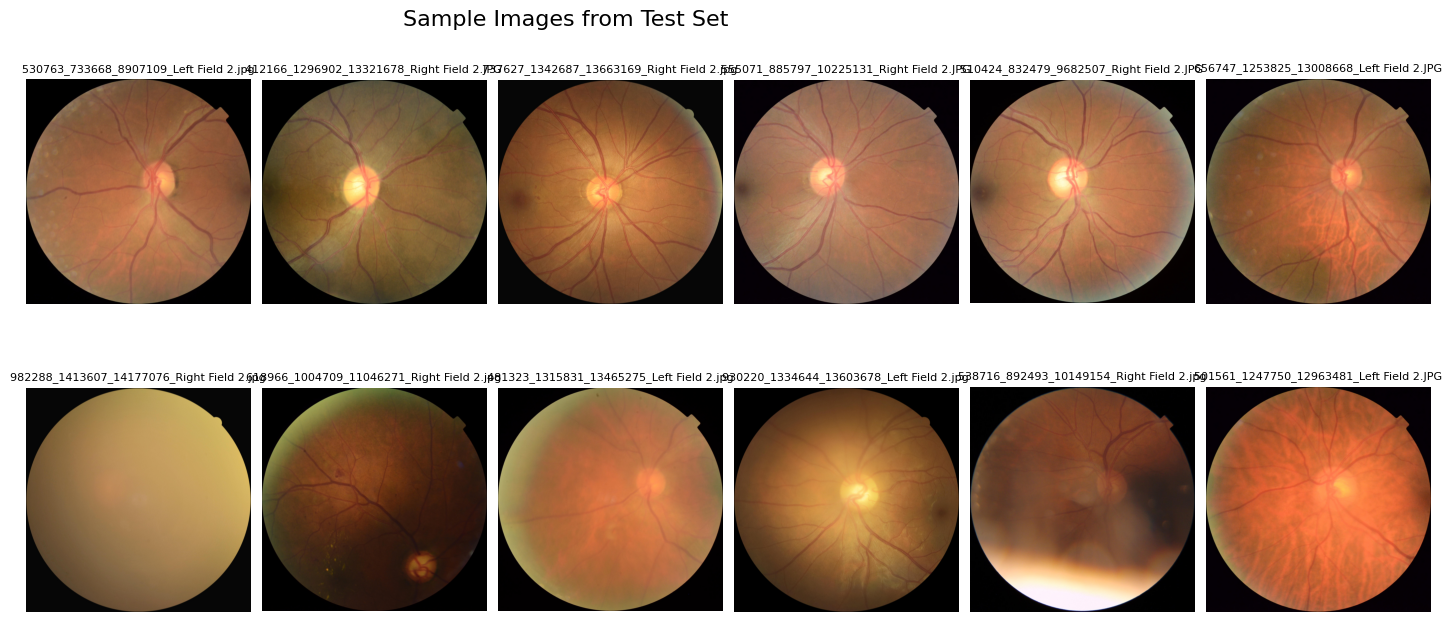

Angles in test set:
  - 690J
  - 692J


In [15]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def visualize_lacdhs_quality_dataset(base_path, samples_per_angle=6):
    main_folders = ['test'] #, 'test'
    
    for main_folder in main_folders:
        main_folder_path = os.path.join(base_path, main_folder)
        if not os.path.exists(main_folder_path):
            print(f"{main_folder} folder not found")
            continue
        
        print(f"\nVisualizing samples from {main_folder} folder:")
        
        angle_folders = [f for f in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, f))]
        
        # Calculate grid size
        n_angles = len(angle_folders)
        n_cols = samples_per_angle
        n_rows = n_angles
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3.5))
        fig.suptitle(f'Sample Images from {main_folder.capitalize()} Set', fontsize=16)
        
        for i, angle_folder in enumerate(angle_folders):
            angle_folder_path = os.path.join(main_folder_path, angle_folder)
            image_files = [f for f in os.listdir(angle_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            
            if len(image_files) < samples_per_angle:
                print(f"Warning: Not enough images in {angle_folder}. Using all available images.")
                selected_files = image_files
            else:
                selected_files = random.sample(image_files, samples_per_angle)
            
            for j, image_file in enumerate(selected_files):
                img_path = os.path.join(angle_folder_path, image_file)
                img = Image.open(img_path)
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
                
                # Add image filename as title for each subplot
                axes[i, j].set_title(image_file, fontsize=8)
                
                if j == 0:
                    axes[i, j].set_ylabel(angle_folder, rotation=0, labelpad=40, va='center', fontsize=10)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.95, bottom=0.05, left=0.2, right=0.98)
        plt.show()
        
        # Print confirmation of angles
        print(f"Angles in {main_folder} set:")
        for angle in angle_folders:
            print(f"  - {angle}")

# Usage
base_path = "/data/sreenidhi/EyeAI_working/"
visualize_lacdhs_quality_dataset(base_path)

In [16]:

output_path = str(EA.working_dir) + "/Execution_Assets/" + configuration_records.vocabs['Execution_Asset_Type'][0].name
os.mkdir(output_path)

In [17]:
output_path

'/data/sreenidhi/EyeAI_working/Execution_Assets/VGG19_Catalog_Model_LACDHS_quality_training'

In [18]:
best_hyper_parameters_json_path = str(configuration_records.assets_paths[0])

In [19]:
best_hyper_parameters_json_path

'/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json'

In [21]:
model_path = str(configuration_records.assets_paths[1])

In [22]:
model_path

'/data/sreenidhi/EyeAI_working/Execution_Assets/VGG19_Catalog_LAC_DHS_Quality_Van_Graded_Trained_model_June_30_2024.h5'

In [20]:
import json

# Open and load the JSON file
with open(best_hyper_parameters_json_path, 'r') as file:
    data = json.load(file)

# Print the contents of the JSON file
print(json.dumps(data, indent=4))

{
    "rotation_range": -6,
    "width_shift_range": 0.049283662164352315,
    "height_shift_range": 0.062129040368351915,
    "horizontal_flip": true,
    "vertical_flip": true,
    "zoom_range": -0.03493437617512693,
    "brightness_range": 0.016808387649284325,
    "use_class_weights": true,
    "pooling": "global_average",
    "dense_layers": 2,
    "units_layer_0": 512,
    "activation_func_0": "sigmoid",
    "batch_norm_0": true,
    "dropout_0": 0.10646478371824658,
    "units_layer_1": 64,
    "activation_func_1": "relu",
    "batch_norm_1": false,
    "dropout_1": 0.2830490167548361,
    "fine_tune_at": 0,
    "fine_tuning_learning_rate_adam": 1.1688327470992886e-05,
    "batch_size": 32
}


In [26]:

# @title Execute Evaluation algorithm

from eye_ai.models.vgg19_lacdhs_quality_predict import predict_and_evaluate
with EA.execution(execution_rid=configuration_records.execution_rid) as exec:
    predict_and_evaluate(
        model_path=model_path,
        image_path=test_path,
        output_dir=output_path,
        best_hyperparameters_json_path=best_hyper_parameters_json_path
    )
    


2024-07-01 14:00:40.584488: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 14:00:40.584537: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 14:00:40.585436: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-01 14:00:40.591222: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-01 14:00:41.382206: W tensorflow/compiler/tf2

Found 1000 images belonging to 2 classes.


2024-07-01 14:00:45.661240: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


32/32 [==============================] - 36s 1s/step


2024-07-01 14:01:20,299 - INFO - 
Evaluation Metrics:
2024-07-01 14:01:20,299 - INFO - Accuracy: 0.937
2024-07-01 14:01:20,300 - INFO - Precision: 0.9680729760547321
2024-07-01 14:01:20,300 - INFO - Recall: 0.9604072398190046
2024-07-01 14:01:20,301 - INFO - F1 Score: 0.9642248722316865
2024-07-01 14:01:20,302 - INFO - ROC AUC: 0.9528982680605399
2024-07-01 14:01:20,315 - INFO - Classification Report:
2024-07-01 14:01:20,316 - INFO - {
  "692J": {
    "precision": 0.7154471544715447,
    "recall": 0.7586206896551724,
    "f1-score": 0.7364016736401674,
    "support": 116.0
  },
  "690J": {
    "precision": 0.9680729760547321,
    "recall": 0.9604072398190046,
    "f1-score": 0.9642248722316865,
    "support": 884.0
  },
  "accuracy": 0.937,
  "macro avg": {
    "precision": 0.8417600652631384,
    "recall": 0.8595139647370884,
    "f1-score": 0.850313272935927,
    "support": 1000.0
  },
  "weighted avg": {
    "precision": 0.9387683807510823,
    "recall": 0.937,
    "f1-score": 0.937


Evaluation Metrics:
Accuracy: 0.937
Precision: 0.9680729760547321
Recall: 0.9604072398190046
F1 Score: 0.9642248722316865
ROC AUC: 0.9528982680605399

Classification Report:
              precision    recall  f1-score   support

        692J       0.72      0.76      0.74       116
        690J       0.97      0.96      0.96       884

    accuracy                           0.94      1000
   macro avg       0.84      0.86      0.85      1000
weighted avg       0.94      0.94      0.94      1000

Predictions saved to quality_predictions.csv
Confusion matrix saved as confusion_matrix.png
ROC curve saved as roc_curve.png


In [27]:
# # @title Save Execution Assets (model) and Metadata
uploaded_assets = EA.execution_upload(configuration_records.execution_rid, True)

2024-07-01 14:02:06,423 - INFO - Initializing uploader: GenericUploader v1.7.1 [Python 3.10.13, Linux-5.10.210-201.852.amzn2.x86_64-x86_64-with-glibc2.26]
2024-07-01 14:02:06,424 - INFO - Creating client of type <class 'globus_sdk.services.auth.client.native_client.NativeAppAuthClient'> for service "auth"
2024-07-01 14:02:06,424 - INFO - Finished initializing AuthLoginClient. client_id='8ef15ba9-2b4a-469c-a163-7fd910c9d111', type(authorizer)=<class 'globus_sdk.authorizers.base.NullAuthorizer'>
2024-07-01 14:02:06,460 - INFO - Checking for updated configuration...
2024-07-01 14:02:06,758 - INFO - Updated configuration found.
2024-07-01 14:02:06,760 - INFO - Scanning files in directory [/data/sreenidhi/EyeAI_working/Execution_Assets/VGG19_Catalog_Model_LACDHS_quality_training]...
2024-07-01 14:02:06,764 - INFO - Including file: [/data/sreenidhi/EyeAI_working/Execution_Assets/VGG19_Catalog_Model_LACDHS_quality_training/quality_predictions.csv].
2024-07-01 14:02:06,764 - INFO - Including f